In [1]:
''' Import libraries '''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns   

from sklearn.pipeline import Pipeline   
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import KFold  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV    
from sklearn.model_selection import RandomizedSearchCV  

from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge   
from sklearn.linear_model import ElasticNet 

pd.set_option('display.max_columns', 900)   
pd.set_option('display.max_rows', 900)

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'   

In [2]:
from Linear_Model_Creation_Function import OLS_Model_Creation
lin_reg, X_train, X_test, y_train, y_test = OLS_Model_Creation(path = './data/kaggle/created/homes_grouped.csv', include_variables = 'num_and_upgradable') 

In [33]:
def variable_importance(X_train, y_train, alphas, ignore_list=False, ignore_list_names=None):
    
    '''
    This function takes X_train and y_train data and runs lasso regression for a variety of variables.
    The function outputs a list of nested lists. 
    The nested list has ('Value of Alpha', ['List of most important variables'], 'R^2 value')
    '''
    
    from sklearn.linear_model import Lasso 
    
    lasso  = Lasso()
    lasso.set_params(normalize=True)
    coefs_lasso = []
    score_lasso = []
    
    # fit a bunch of lasso models based on differing alphas. Store coefficients and R^2 scores along the way
    for alpha in alphas:
            lasso.set_params(alpha=alpha)
            lasso.fit(X_train, y_train)  
            coefs_lasso.append(lasso.coef_)
            score_lasso.append(lasso.score(X_train, y_train))

    coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns) 
    
    # if we have decided to keep some variables and want to look at the relative importance of the rest...
    if ignore_list == True:
        # get list of variables we want to look at
#         Full_list = coefs_lasso.columns.to_list()
#         To_ignore_list = ignore_list_names
#         Non_ignored_list = [x for x in Full_list if not x in To_ignore_list or To_ignore_list.remove(x)]
        # filter df on these columns
        coefs_lasso = coefs_lasso[ignore_list_names]
    else:
        coefs_lasso = coefs_lasso

    return coefs_lasso

In [36]:
significant_variables = ['OverallQual', 'Fireplaces', 'FullBath', 
                         'KitchenQual_low', 'BsmtFullBath', 'BsmtFinType1_GLQ',
                         'GarageType_Detchd', 'GarageArea', 'WoodDeckSF',
                         'MasVnrArea']

# All Numerical and Upgradable Categorical Features

/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85573399437.67932, tolerance: 575510855.8181409
  positive)
No handles with labels found to put in legend.


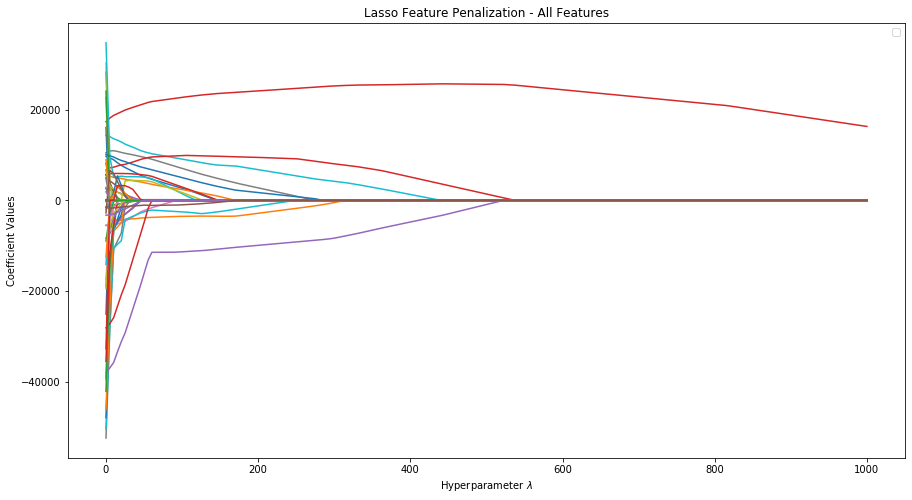

In [58]:
# Defining inputs
alphas = np.linspace(0.00001,1000,200)

# Running function
coefs_lasso = variable_importance(X_train,
                                  y_train,
                                  alphas=alphas,
                                  ignore_list=False,
                                  ignore_list_names=significant_variables)

plt.figure(figsize=(15,8))  
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name]) # , label=name

# plt.figure(figsize=(10,10))   
plt.xlabel(r'Hyperparameter $\lambda$')
plt.ylabel(r'Coefficient Values')
plt.legend(loc="best") 
plt.title('Lasso Feature Penalization - All Features')
plt.savefig('_All.png')
plt.show()

# Top 10 Numerical and Upgradable Categorical Features

/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85573399437.67932, tolerance: 575510855.8181409
  positive)


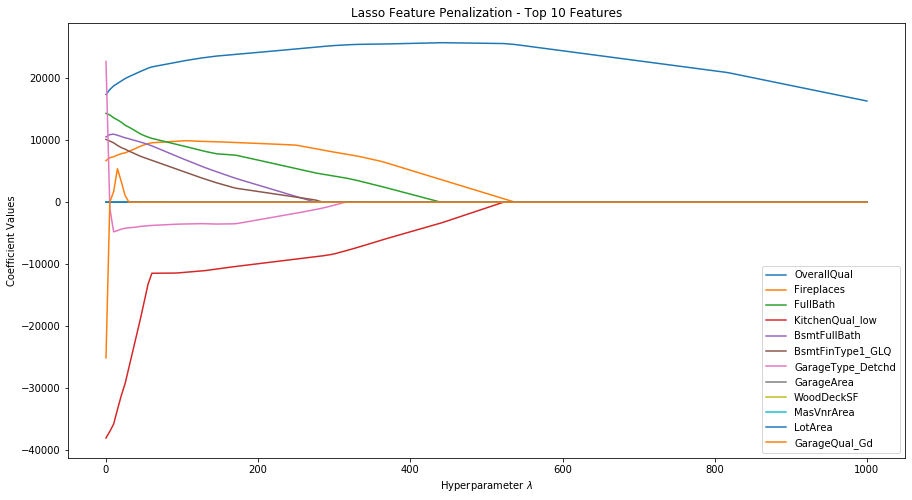

In [59]:
# Defining inputs
alphas = np.linspace(0.00001,1000,200)

# Running function
coefs_lasso = variable_importance(X_train,
                                  y_train,
                                  alphas=alphas,
                                  ignore_list=True,
                                  ignore_list_names=significant_variables)

plt.figure(figsize=(15,8))  
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name) # , label=name

# plt.figure(figsize=(10,10))   
plt.xlabel(r'Hyperparameter $\lambda$')
plt.ylabel(r'Coefficient Values')
plt.legend(loc="best") 
plt.title('Lasso Feature Penalization - Top 10 Features')
plt.savefig('_Top_10.png')
plt.show()

# Top 5 Upgradable Categorical Features

/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85573399437.67932, tolerance: 575510855.8181409
  positive)


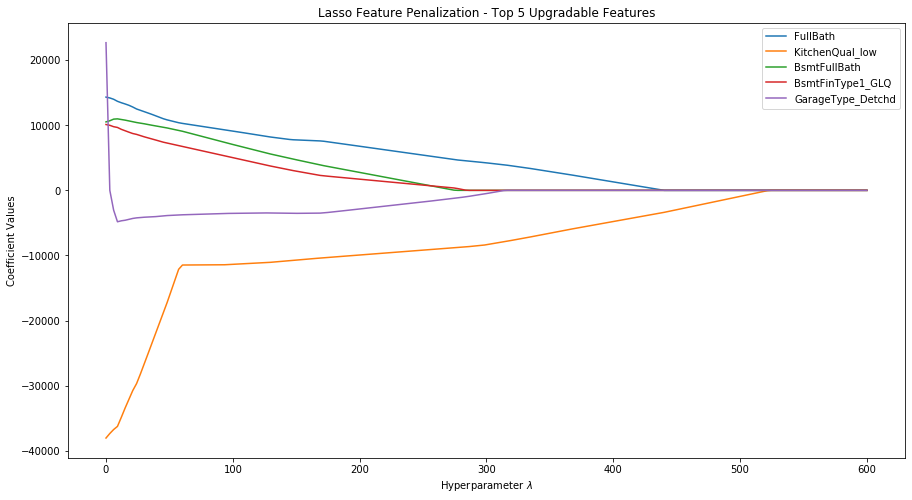

In [60]:
top_five_variables = ['FullBath','KitchenQual_low',
                         'BsmtFullBath', 'BsmtFinType1_GLQ', 'GarageType_Detchd']
# Defining inputs
alphas = np.linspace(0.00001,600,200)
# Running function
coefs_lasso = variable_importance(X_train,
                                  y_train,
                                  alphas=alphas,
                                  ignore_list=True,
                                  ignore_list_names=top_five_variables)
plt.figure(figsize=(15,8))  
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name) # , label=name

# plt.figure(figsize=(10,10))   
plt.xlabel(r'Hyperparameter $\lambda$')

plt.ylabel(r'Coefficient Values')
plt.legend(loc="best") 
plt.title('Lasso Feature Penalization - Top 5 Upgradable Features', fontname="Bold")
plt.savefig('_Top_5.png')
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'font_manager'

In [3]:

from sklearn.linear_model import Lasso 

lasso  = Lasso()
lasso.set_params(normalize=True)
coefs_lasso = []
score_lasso = []

# fit a bunch of lasso models based on differing alphas. Store coefficients and R^2 scores along the way
for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train, y_train)  
        coefs_lasso.append(lasso.coef_)
        score_lasso.append(lasso.score(X_train, y_train))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns) 

# if we have decided to keep some variables and want to look at the relative importance of the rest...
if ignore_list == True:
    # get list of variables we want to look at
    Full_list = coefs_lasso.columns.to_list()
    To_ignore_list = ignore_list_names
    Non_ignored_list = [x for x in Full_list if not x in To_ignore_list or To_ignore_list.remove(x)]
    coefs_lasso = coefs_lasso.transpose().abs()
    # filter list on these variables
    coefs_lasso = coefs_lasso.loc[Non_ignored_list]
else:
    coefs_lasso = coefs_lasso.transpose().abs()

variable_importance_list = []

for colname in coefs_lasso.columns:

    intermediate = coefs_lasso[[colname]].sort_values(by = colname, ascending = False).head(num_variables)

    # store alpha as string
    string_alpha = 'Alpha = ' + str(colname)

    # store R^2 value as string for this alpha
    idx = coefs_lasso.columns.get_loc(colname)
    string_R_Squared = 'R^2 = ' + str(round(score_lasso[idx], 3))

    # store list of top # of variable names for this iteration of alpha
    var_names = []
    for row in intermediate.index: 
        var_names.append(row)

    # create list of all important information for each iteration of alpha
    if values == True:
        variable_importance_list.append([string_alpha, var_names, string_R_Squared, intermediate[colname].values.tolist()]) 
    else:
        variable_importance_list.append([string_alpha, var_names, string_R_Squared])
    


In [3]:
def variable_importance(X_train, y_train, alphas, num_variables = 5, values = False, ignore_list = False, ignore_list_names = None):
    
    '''
    This function takes X_train and y_train data and runs lasso regression for a variety of variables.
    The function outputs a list of nested lists. 
    The nested list has ('Value of Alpha', ['List of most important variables'], 'R^2 value')
    '''
    
    from sklearn.linear_model import Lasso 
    
    lasso  = Lasso()
    lasso.set_params(normalize=True)
    coefs_lasso = []
    score_lasso = []
    
    # fit a bunch of lasso models based on differing alphas. Store coefficients and R^2 scores along the way
    for alpha in alphas:
            lasso.set_params(alpha=alpha)
            lasso.fit(X_train, y_train)  
            coefs_lasso.append(lasso.coef_)
            score_lasso.append(lasso.score(X_train, y_train))

    coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns) 
    
    # if we have decided to keep some variables and want to look at the relative importance of the rest...
    if ignore_list == True:
        # get list of variables we want to look at
        Full_list = coefs_lasso.columns.to_list()
        To_ignore_list = ignore_list_names
        Non_ignored_list = [x for x in Full_list if not x in To_ignore_list or To_ignore_list.remove(x)]
        coefs_lasso = coefs_lasso.transpose().abs()
        # filter list on these variables
        coefs_lasso = coefs_lasso.loc[Non_ignored_list]
    else:
        coefs_lasso = coefs_lasso.transpose().abs()
          
    variable_importance_list = []

    for colname in coefs_lasso.columns:
        
        intermediate = coefs_lasso[[colname]].sort_values(by = colname, ascending = False).head(num_variables)
        
        # store alpha as string
        string_alpha = 'Alpha = ' + str(colname)
        
        # store R^2 value as string for this alpha
        idx = coefs_lasso.columns.get_loc(colname)
        string_R_Squared = 'R^2 = ' + str(round(score_lasso[idx], 3))
        
        # store list of top # of variable names for this iteration of alpha
        var_names = []
        for row in intermediate.index: 
            var_names.append(row)
        
        # create list of all important information for each iteration of alpha
        if values == True:
            variable_importance_list.append([string_alpha, var_names, string_R_Squared, intermediate[colname].values.tolist()]) 
        else:
            variable_importance_list.append([string_alpha, var_names, string_R_Squared])
    
#     print(coefs_lasso)
    return variable_importance_list

In [ ]:
ignore_list = Diff( X_train.columns.to_list(), upgradable_variables);

# Defining inputs
alphas = np.linspace(0.00001,1000,200)
numerical_list = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
categorical_list = ['Alley', 'BldgType_group', 'BsmtCond_group', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual_group', 'CentralAir', 'Condition1_group', 'Electrical_group', 'ExterCond_group', 'ExterQual', 'Exterior1st_group', 'Exterior2nd_group', 'Fence', 'FireplaceQu', 'Foundation_group', 'GarageCond_group', 'GarageFinish', 'GarageQual', 'GarageType', 'HeatingQC_group', 'HouseStyle_group', 'KitchenQual', 'LandContour_group', 'LandSlope', 'LotConfig_group', 'LotShape_group', 'MS_Zoning_group', 'MasVnrType_group', 'Neighborhood', 'PavedDrive', 'RoofStyle_group', 'SaleCondition_group', 'SaleType_group']

# Running function
variable_importance(X_train, y_train, alphas=alphas, num_variables=30, values=True, ignore_list=False, ignore_list_names=ignore_list)

In [ ]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)   